In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the protein data
k2 = []
k2d = []

f = open("../../../../../../Data/Proteins/DENV1/2K/DENV1_2Kpeptide.txt", "r")
for x in f:
    if "DSS" in x:
        k2d.append(1)
    elif "DHF" in x:
        k2d.append(1)
    elif x[0] == ">":
        k2d.append(0)
    else:
        x = x.replace("\n", "")
        k2.append(x)
        
# Converting the array into DataFrame
k2 = pd.DataFrame(k2)

# Attaching the "Disease" label column to the input
k2["Disease"] = k2d

# Renaming the columns
k2 = k2.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

# clearing the memory
del k2d

In [3]:
print("The combined shape of the given data is:", str(k2.shape))
print("The length of the combined data is:", str(len(k2.index)))
print("Does the combined data have any null value? ->", k2.isnull().values.any())

k2 = k2.dropna(how = 'any', axis = 0) 

# Shuffling the data
k2 = k2.sample(frac = 1)

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False


In [4]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

k2['words'] = k2.apply(lambda x: getKmers(x['Sequence']), axis = 1)
k2 = k2.drop('Sequence', axis=1)

k2_texts = list(k2['words'])
for item in range(len(k2_texts)):
    k2_texts[item] = ' '.join(k2_texts[item])

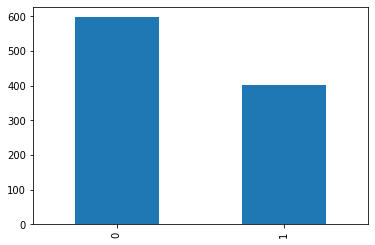

In [5]:
# Creating y and printing the shape of it
y = k2.iloc[:, 0].values
k2["Disease"].value_counts().sort_index().plot.bar()

# clearing the memory
del k2

In [6]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(k2_texts)

# clearing the memory
del cv

In [7]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify=y)

# Printing the shapes of the train and test matrices
print("The shape of x_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of x_test is:", X_test.shape)
print("The shape of y_test is:", y_test.shape)

# clearing the memory
del x
del y

The shape of x_train is: (799, 49)
The shape of y_train is: (799,)
The shape of x_test is: (200, 49)
The shape of y_test is: (200,)


## Keras

In [8]:
# Importing the Keras libraries
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=49, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# clearing the memory
del model
del accuracy

Using TensorFlow backend.
W0323 17:40:38.769754 139855728453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0323 17:40:38.787386 139855728453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0323 17:40:38.789848 139855728453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0323 17:40:38.831973 139855728453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0323 17:40:38.852604 13985572

Epoch 1/150
799/799 [==============================] - 0s 595us/step - loss: 0.6878 - acc: 0.5519
Epoch 2/150
799/799 [==============================] - 0s 180us/step - loss: 0.6764 - acc: 0.5970
Epoch 3/150
799/799 [==============================] - 0s 166us/step - loss: 0.6752 - acc: 0.5970
Epoch 4/150
799/799 [==============================] - 0s 280us/step - loss: 0.6755 - acc: 0.5970
Epoch 5/150
799/799 [==============================] - 0s 367us/step - loss: 0.6754 - acc: 0.5970
Epoch 6/150
799/799 [==============================] - 0s 250us/step - loss: 0.6746 - acc: 0.5970
Epoch 7/150
799/799 [==============================] - 0s 252us/step - loss: 0.6752 - acc: 0.5970
Epoch 8/150
799/799 [==============================] - 0s 261us/step - loss: 0.6745 - acc: 0.5970
Epoch 9/150
799/799 [==============================] - 0s 225us/step - loss: 0.6757 - acc: 0.5970
Epoch 10/150
799/799 [==============================] - 0s 133us/step - loss: 0.6752 - acc: 0.5970
Epoch 11/150
799/79

799/799 [==============================] - 0s 163us/step - loss: 0.6730 - acc: 0.5970
Epoch 83/150
799/799 [==============================] - 0s 183us/step - loss: 0.6728 - acc: 0.5945
Epoch 84/150
799/799 [==============================] - 0s 206us/step - loss: 0.6726 - acc: 0.5945
Epoch 85/150
799/799 [==============================] - 0s 358us/step - loss: 0.6730 - acc: 0.5957
Epoch 86/150
799/799 [==============================] - 0s 130us/step - loss: 0.6726 - acc: 0.5970
Epoch 87/150
799/799 [==============================] - 0s 128us/step - loss: 0.6728 - acc: 0.5957
Epoch 88/150
799/799 [==============================] - 0s 146us/step - loss: 0.6727 - acc: 0.5970
Epoch 89/150
799/799 [==============================] - 0s 131us/step - loss: 0.6731 - acc: 0.5957
Epoch 90/150
799/799 [==============================] - 0s 174us/step - loss: 0.6728 - acc: 0.5957
Epoch 91/150
799/799 [==============================] - 0s 141us/step - loss: 0.6728 - acc: 0.5957
Epoch 92/150
799/799 [=